# Neural & Behavioral Modeling - Week 5 (Exercises)
by Your Name (Your Email)

In [26]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Drifit Diffusion Model (5 points)

Use whatever analytical methods to check if Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data, especially the exponential long tail. Remember to play around with different model parameters to see how they affect simulation results.

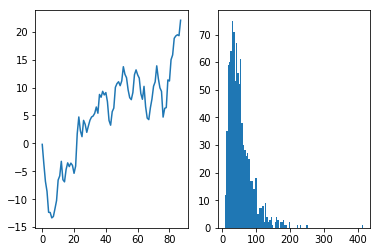

In [2]:
# Tren's implementation

from numpy import *

mu,sigma=0.2,2 # Diffusion type1
p=0.4 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        dY=mu+random.normal(mu,sigma); # type1
        #dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs[i]=RT;
subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs,100);

### Write your analysis or code here

In [10]:
# Model parameters:
mu,sigma=2,2
lmbd=5
x=arange(0,10,0.1)

from scipy.special import erfc
from scipy.stats import kstest

def cdfexGauss(mu,sigma,lamda,x):
    exGauss=lamda/2*exp(lamda/2*(2*mu+lamda*sigma**2-2*x))* \
    erfc((mu+lamda*sigma**2-x)/(sqrt(2)*sigma))
    cdfexGauss=cumsum(exGauss)
    return cdfexGauss
    
args=[mu,sigma,lmbd]
kstest(RTs,lambda x: cdfexGauss(mu,sigma,lmbd,x))
# Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data

KstestResult(statistic=0.98568024273947696, pvalue=0.0)

## 2 Choose ONE of the following tasks (5 points):

(1) Port EZdata.m from Matlab to Python

(2) Port dataEz.m from Matlab to Python

(3) Provide an intuitive explanation about the form of exGuassian's probability density function (PDF).

<font color="grey">(Mathemaitcal derivation of that PDF may help you to figure out what's going on but please try to explain the whole thing in plain English.)</font>

In [196]:
import math
def isempty(x):
    a=1 if x==[] else 0
    return a
# function [Pc,VRT,MRT] = EZdata(v,a,Ter,s)
def EZdata(v,a,Ter,s=.1):
# %-- The scaling parameter s has a ubiquitous default of 0.1
# if (nargin<4) ; s = 0.1 ; end
    s2=s**2
# %-- Probability correct
# y = -v .* a ./ s2 ;
    y=-v*a/s2
# Pc = 1 ./ (1+exp(y)) ;
    Pc=1/(1+math.exp(y))
# %-- Postpone special case v=0
# idx = find(v~=0) ;
    v=[v]
    v=array(v)
    idx=nonzero(v)#find(v!=0)
# vi = v(idx) ;
    vi=v[idx]
# yi = y(idx) ;
    y=[y]
    y=array(y)
    yi=y[idx]
# if (numel(a)==1) ; ai = a ; else ai = a(idx) ; end    % allow for scalar a
    ai=a if size(a)==1 else a[idx]
# %-- Variance of response times -- Equation 6 in Wagenmakers et al
# exp_yi = exp(yi) ;
    exp_yi=math.exp(yi)
# VRTi = (2.*yi.*exp_yi - exp(2.*yi) + 1) ./ (exp_yi+1).^2 ;
    VRTi=(2*yi*exp_yi-math.exp(2*yi)+1)/(exp_yi+1)**2
# VRTi = VRTi .* (ai.*s2./(2.*vi.^3)) ;
    VRTi=VRTi*(ai*s2/(2*vi**3))
# VRT = NaN(size(v)) ;
    VRT=zeros(len(v))
    for i in range(len(v)):
        VRT[i]=nan
# VRT(idx) = VRTi ;
    VRT[idx]=VRTi
# %-- Mean decision time -- Equation 9
# MDTi = (1-exp_yi)./(1+exp_yi) ;
    MDTi=(1-exp_yi)/(1+exp_yi)
# MDTi = MDTi .* (ai./(2.*vi)) ;
    MDTi=MDTi*(ai/(2*vi))
# MDT = NaN(size(v)) ;
    MDT=zeros(len(v))
    for i in range(len(v)):
        MDT[i]=nan
# MDT(idx) = MDTi ;
    MDT[idx]=MDTi
# %-- Now handle special case v=0
# idx = find(v==0) ;
    idx=nonzero(v==0)#idx=find(v==0)
# if (~isempty(idx))
    if(not isempty(idx)):
#     if (numel(a)==1) ; ai = a ; else ai = a(idx) ; end
        ai=a if size(a)==1 else a[idx]
#         %- Variance of response times
#     VRTi = ai.^4 ./ (24*s2.^2);     % Eq. on top of p. 9, right
        VRTi=ai**4/(24*s2**2)
#     VRT(idx) = VRTi ;
        VRT[idx]=VRTi
#     %- Mean decision time
#     MDTi = ai.^2 ./ (4*s2) ;
        MDTi=ai**2/(4*s2)
#     MDT(idx) = MDTi ;
        MDT[idx]=MDTi;
# end
# %-- Observable Mean RT = Mean decision time + Ter
# MRT = MDT + Ter ;   % Equation 8
    MRT=MDT+Ter
    return Pc,VRT,MRT
# %---   Return Pc, VRT, MRT
# %%%%%% End of file EZdata.m
Pc,VRT,MRT=EZdata(.1,.14,.300)
print(Pc,VRT,MRT)

0.8021838885585817 [ 0.11203504] [ 0.72305744]
